<a href="https://colab.research.google.com/github/panpepson/ML-AI-pep/blob/master/DW_k5_cats_dogs_d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os 
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

In [4]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 08:23:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   183MB/s    in 0.4s    

2019-04-12 08:23:42 (183 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall(path='/tmp')
#zip_.extractall()
zip_.close()

In [0]:
!unzip /tmp/cats_and_dogs_filtered.zip -d /tmp/

In [9]:
!ls /tmp/

cats_and_dogs_filtered	cats_and_dogs_filtered.zip


In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')


In [0]:
#sciezka do kota i psa 
#było
  # all_cat_files = os.listdir( train_cats_dir )
  # cats_files = [os.path.join( train_cats_dir, file ) for file in all_cat_files][:25]
  # all_dog_files = os.listdir( train_dogs_dir )
  # dogs_files = [os.path.join( train_dogs_dir, file ) for file in all_dog_files][:25]

def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join( item_dir, file ) for file in all_item_dirs][:top]

  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout()

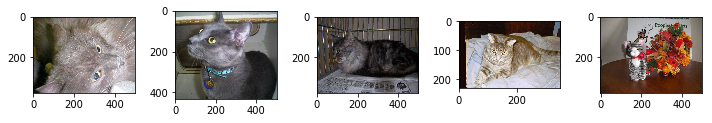

In [29]:
plot_images(train_cats_dir)

In [52]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32,(3,3), input_shape=input_shape),
    MaxPool2D(),
    
    Conv2D(64,(3,3), activation='relu'), # filtry
    MaxPool2D((2,2)),
    
    Conv2D(128,(3,3), activation='relu'), #było 64
    MaxPool2D((2,2)),
       
    
    Flatten(),
    
    Dense(128, activation='relu'), #wezly było 64
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 36992)             0         
__________

In [0]:
#normalizacja danych 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [40]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150 ),
    batch_size = 20,
    class_mode = 'binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150 ),
    batch_size = 20,
    class_mode = 'binary' 
)






Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 10, 
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/10
50/50 [==============================] - 20s 393ms/step - loss: 0.6294 - acc: 0.6840
 - 139s - loss: 0.6591 - acc: 0.5945 - val_loss: 0.6294 - val_acc: 0.6840
Epoch 2/10
50/50 [==============================] - 19s 387ms/step - loss: 0.6572 - acc: 0.5860
 - 137s - loss: 0.6309 - acc: 0.6595 - val_loss: 0.6572 - val_acc: 0.5860
Epoch 3/10
50/50 [==============================] - 20s 390ms/step - loss: 0.5780 - acc: 0.7030
 - 136s - loss: 0.5853 - acc: 0.6980 - val_loss: 0.5780 - val_acc: 0.7030
Epoch 4/10
50/50 [==============================] - 19s 383ms/step - loss: 0.5886 - acc: 0.6950
 - 136s - loss: 0.5435 - acc: 0.7330 - val_loss: 0.5886 - val_acc: 0.6950
Epoch 5/10
50/50 [==============================] - 20s 395ms/step - loss: 0.5395 - acc: 0.7330
 - 138s - loss: 0.4984 - acc: 0.7550 - val_loss: 0.5395 - val_acc: 0.7330
Epoch 6/10
50/50 [==============================] - 19s 389ms/step - loss: 0.5852 - acc: 0.7130
 - 137s - loss: 0.4374 - acc: 0.7970 - val_loss: 0.585